## Feature Selection

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
df = pd.read_csv('data/df_fe.csv', sep=",", index_col=0)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 0 to 4982
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4983 non-null   object 
 1   Stock              4983 non-null   object 
 2   Open               4983 non-null   float64
 3   Low                4983 non-null   float64
 4   Close              4983 non-null   float64
 5   Volume             4983 non-null   float64
 6   30_day_MA          4983 non-null   float64
 7   60_day_MA          4983 non-null   float64
 8   90_day_MA          4983 non-null   float64
 9   30_day_MA.1        4983 non-null   float64
 10  60_day_MA.1        4983 non-null   float64
 11  90_day_MA.1        4983 non-null   float64
 12  SMA_30             4983 non-null   float64
 13  SMA_60             4983 non-null   float64
 14  SMA_90             4983 non-null   float64
 15  EMA_30             4983 non-null   float64
 16  EMA_60             4983 non-n

In [72]:
df.describe()

,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,30_day_MA.1,60_day_MA.1,90_day_MA.1,...,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
count,4983.000000,4983.000000,4983.000000,4.983000e+03,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,...,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,259.294943,253.834808,256.720189,2.979736e+07,255.798546,254.855845,253.890509,255.798546,254.855845,253.890509,...,253.890586,56.153911,256.365420,255.923791,0.441629,0.438867,0.002762,0.178924,701.948224,2.599839
std,80.257335,79.085633,79.741265,1.264299e+07,80.105382,80.496333,80.896700,80.105382,80.496333,80.896700,...,80.756558,34.692417,79.850552,80.007346,2.168261,2.024397,0.687977,1.998316,482.616253,1.322692
min,56.740002,55.529999,55.910000,8.989200e+06,51.945666,52.309333,50.519333,51.945666,52.309333,50.519333,...,50.523063,0.000000,52.735685,52.177104,-6.925049,-5.925486,-3.023339,-14.739031,153.000000,1.000000
25%,216.684998,212.825005,214.724998,2.179075e+07,214.026666,213.320666,212.409500,214.026666,213.320666,212.409500,...,212.321271,29.956179,214.615885,214.087768,-0.719073,-0.651546,-0.379777,-0.846559,393.000000,1.000000
50%,266.739990,259.299988,264.600006,2.664930e+07,262.415332,262.240833,260.916000,262.415332,262.240833,260.916000,...,260.959094,59.601027,262.848663,262.066833,0.724854,0.748739,0.007699,0.169304,608.000000,2.000000
75%,326.640015,320.079987,322.955002,3.345930e+07,322.671170,322.527083,322.933003,322.671170,322.527083,322.933003,...,323.635396,87.958869,322.968505,323.083009,1.834364,1.724229,0.415283,1.227199,872.000000,4.000000
max,384.299988,378.160004,382.700012,9.701270e+07,380.630674,379.668004,378.683226,380.630674,379.668004,378.683226,...,377.553844,100.000000,382.269296,380.971581,6.306008,5.583934,2.411577,14.216888,5369.000000,5.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 0 to 4982
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4983 non-null   object 
 1   Stock              4983 non-null   object 
 2   Open               4983 non-null   float64
 3   Low                4983 non-null   float64
 4   Close              4983 non-null   float64
 5   Volume             4983 non-null   float64
 6   30_day_MA          4983 non-null   float64
 7   60_day_MA          4983 non-null   float64
 8   90_day_MA          4983 non-null   float64
 9   30_day_MA.1        4983 non-null   float64
 10  60_day_MA.1        4983 non-null   float64
 11  90_day_MA.1        4983 non-null   float64
 12  SMA_30             4983 non-null   float64
 13  SMA_60             4983 non-null   float64
 14  SMA_90             4983 non-null   float64
 15  EMA_30             4983 non-null   float64
 16  EMA_60             4983 non-n

In [74]:
df['date'] = pd.to_datetime(df['date'])

# Select only the numerical columns from the DataFrame
df_numerical = df.select_dtypes(include=['int64', 'float64'])
# Correlation Analysis
corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,30_day_MA.1,60_day_MA.1,90_day_MA.1,SMA_30,SMA_60,SMA_90,EMA_30,EMA_60,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
Open,1.000000,0.999338,0.999460,-0.136302,0.997887,0.995648,0.993629,0.997887,0.995648,0.993629,0.997887,0.995648,0.993629,0.998534,0.996971,0.995422,-0.034416,0.999387,0.998738,-0.048336,-0.049472,-0.006765,-0.000025,-0.004995,-0.043445
Low,0.999338,1.000000,0.999462,-0.160591,0.997311,0.994563,0.992172,0.997311,0.994563,0.992172,0.997311,0.994563,0.992172,0.997987,0.995986,0.994101,-0.028347,0.999172,0.998260,-0.038589,-0.039255,-0.006110,0.000262,-0.004975,-0.040431
Close,0.999460,0.999462,1.000000,-0.148498,0.997124,0.994561,0.992362,0.997124,0.994561,0.992362,0.997124,0.994561,0.992362,0.997890,0.996004,0.994259,-0.019889,0.999161,0.998160,-0.035313,-0.039831,0.005911,0.019828,-0.004777,-0.042393
Volume,-0.136302,-0.160591,-0.148498,1.000000,-0.137483,-0.128583,-0.121859,-0.137483,-0.128583,-0.121859,-0.137483,-0.128583,-0.121859,-0.138264,-0.130728,-0.125535,-0.077031,-0.144322,-0.139501,-0.167451,-0.171769,-0.022308,0.001270,-0.011840,-0.066919
30_day_MA,0.997887,0.997311,0.997124,-0.137483,1.000000,0.998659,0.996647,1.000000,0.998659,0.996647,1.000000,0.998659,0.996647,0.999855,0.999256,0.998015,-0.074288,0.999008,0.999803,-0.101597,-0.093127,-0.046171,-0.025583,-0.004963,-0.044094
60_day_MA,0.995648,0.994563,0.994561,-0.128583,0.998659,1.000000,0.999167,0.998659,1.000000,0.999167,0.998659,1.000000,0.999167,0.998693,0.999728,0.999458,-0.080134,0.996691,0.998368,-0.133959,-0.133367,-0.029752,-0.026454,-0.005541,-0.045481
90_day_MA,0.993629,0.992172,0.992362,-0.121859,0.996647,0.999167,1.000000,0.996647,0.999167,1.000000,0.996647,0.999167,1.000000,0.996895,0.998996,0.999628,-0.081492,0.994493,0.996448,-0.144056,-0.147631,-0.019606,-0.025143,-0.005667,-0.046066
30_day_MA.1,0.997887,0.997311,0.997124,-0.137483,1.000000,0.998659,0.996647,1.000000,0.998659,0.996647,1.000000,0.998659,0.996647,0.999855,0.999256,0.998015,-0.074288,0.999008,0.999803,-0.101597,-0.093127,-0.046171,-0.025583,-0.004963,-0.044094
60_day_MA.1,0.995648,0.994563,0.994561,-0.128583,0.998659,1.000000,0.999167,0.998659,1.000000,0.999167,0.998659,1.000000,0.999167,0.998693,0.999728,0.999458,-0.080134,0.996691,0.998368,-0.133959,-0.133367,-0.029752,-0.026454,-0.005541,-0.045481
90_day_MA.1,0.993629,0.992172,0.992362,-0.121859,0.996647,0.999167,1.000000,0.996647,0.999167,1.000000,0.996647,0.999167,1.000000,0.996895,0.998996,0.999628,-0.081492,0.994493,0.996448,-0.144056,-0.147631,-0.019606,-0.025143,-0.005667,-0.046066


#### onehotencoding 

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

artists_column = df['Stock'].values.reshape(-1, 1)

one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df['Stock'] = np.argmax(one_hot_encoded_artists, axis=1)

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [77]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['DayOfWeek'] = df['date'].dt.dayofweek
# Converting to seconds since the epoch
df['Timestamp'] = df['date'].astype('int64') // 10**9

#### Feature Importance

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

df['date'] = pd.to_datetime(df['date'])


X = df.drop('Price_Change_Pct', axis=1) 
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split

#df['Date'] = pd.to_datetime(df['Date'])


X = df.drop(['Price_Change_Pct','date'], axis=1) 
y = df['Price_Change_Pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor 


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [80]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


              Feature  Importance
17                RSI    0.288735
4              Volume    0.243033
22     MACD_Histogram    0.138588
29          Timestamp    0.041955
27                Day    0.040128
20               MACD    0.036839
21        Signal_Line    0.026470
26              Month    0.023642
28          DayOfWeek    0.023349
3               Close    0.022045
23     Article Length    0.016093
1                Open    0.012762
2                 Low    0.010432
18             EMA_12    0.006339
16             EMA_90    0.006049
13             SMA_90    0.005957
10        90_day_MA.1    0.005755
7           90_day_MA    0.005633
8         30_day_MA.1    0.005467
12             SMA_60    0.005207
15             EMA_60    0.004634
6           60_day_MA    0.004609
9         60_day_MA.1    0.004450
19             EMA_26    0.004308
5           30_day_MA    0.004059
14             EMA_30    0.004057
11             SMA_30    0.003932
24  article_sentiment    0.003198
25            

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

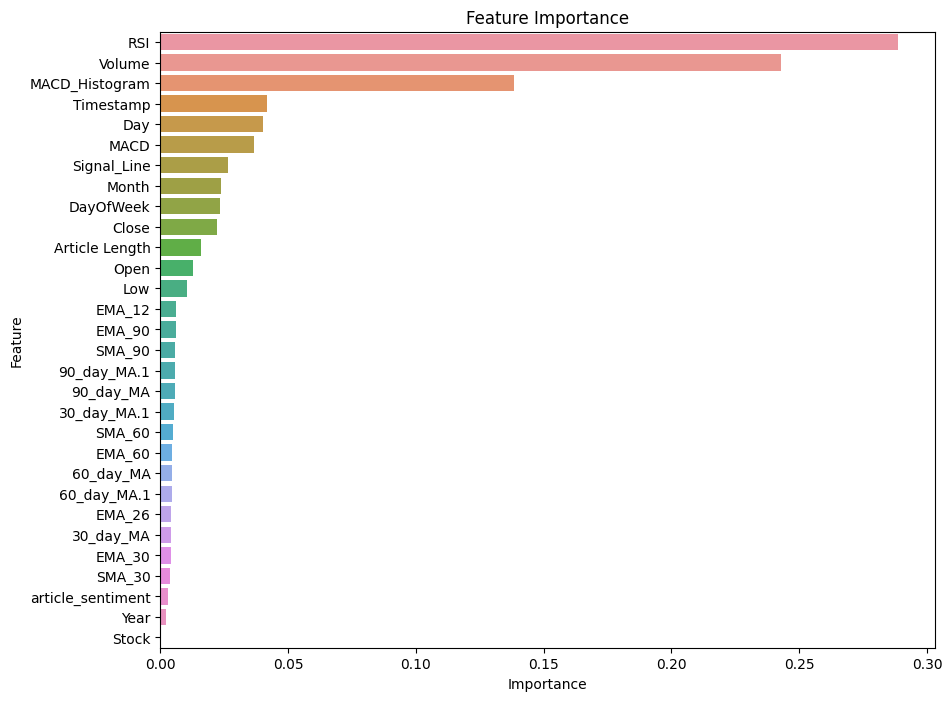

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Recursive Feature Elimination (RFE):
RFE is a technique that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 

In [82]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(random_state=42)

# Initialize RFE with the estimator and the desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1) 
selector = selector.fit(X_train, y_train)
 
selected_features_mask = selector.support_

feature_ranking = selector.ranking_

# Transform the dataset to the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
 
selected_features = X_train.columns[selected_features_mask]
print(f"Selected features: {selected_features}")

# And to see the ranking of all features
ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})
print(ranking_df.sort_values(by='Ranking'))


#### PCA test

##### reduce redundancy 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA. For example, to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Interpret the results
print(f"Number of components to explain 95% variance: {pca.n_components_}")
print(f"Explained variance by component: {pca.explained_variance_ratio_}")

# 'X_pca' is the transformed data with reduced dimensions


Number of components to explain 95% variance: 8
Explained variance by component: [0.64190421 0.09314288 0.04452014 0.03986866 0.03722307 0.03497792
 0.03210193 0.02982555]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your data

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# variance tells you how much information (variance) can be attributed to each principal component
print(pca.explained_variance_ratio_)

[0.64289004 0.09307107 0.04385491 0.03963939 0.03766803 0.03542577
 0.03210086 0.02910879]


In [ ]:
X_train_pca

array([[ 1.3245194 ,  1.15627239,  0.11576395, ...,  0.32028248,
        -1.70312979, -0.21505844],
       [-6.06452033,  0.96448121, -0.72002672, ..., -0.73958371,
        -0.6937306 ,  0.02608153],
       [ 3.92191179,  0.05728388, -0.2756514 , ...,  0.84548108,
        -1.00785222,  1.11066604],
       ...,
       [-5.97080847, -0.40380079, -0.90889947, ...,  1.03424339,
        -0.16129526, -0.70354246],
       [-1.51466405, -0.5432357 ,  0.13935699, ..., -1.28735878,
         0.51934759,  0.71741178],
       [-3.74906089, -2.02645674,  0.33509573, ..., -1.30417595,
        -0.0532669 ,  0.25060096]])